# Diabetes Data Set (Kaggle)

Kaggle: https://www.kaggle.com/mathchi/diabetes-data-set

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EAD

### 1) Pregnancies

In [7]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In this feature the number of pregnancies of 12, 13, 14, 15, 17 have less representation in our dataset so we can ignore it.

In [8]:
len(df)*0.03

23.04

In [9]:
df = df.sort_values('Pregnancies',ascending=False).iloc[23:]

In [10]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
Name: Pregnancies, dtype: int64

### 2) Glucose

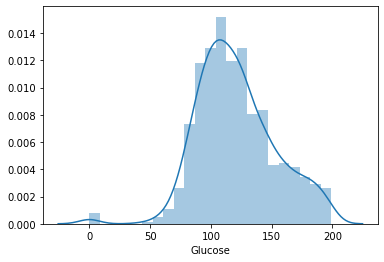

In [11]:
sns.distplot(df['Glucose'])

As we can see there is less representtion in the dataset for data under 50 of glucose so we can drop that data.

In [12]:
df = df.sort_values('Glucose',ascending=True).iloc[10:]

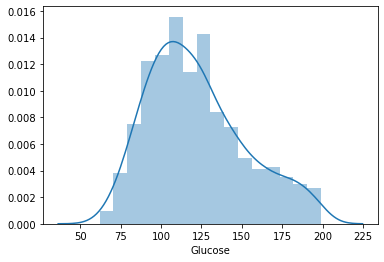

In [13]:
sns.distplot(df['Glucose'])

### 3) Blood Pressure


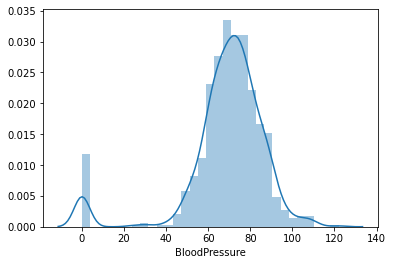

In [14]:
sns.distplot(df['BloodPressure'])

We can see less representation for blood pressure under 40 but we see also there is a mistake and people have 0 of blood pressure.

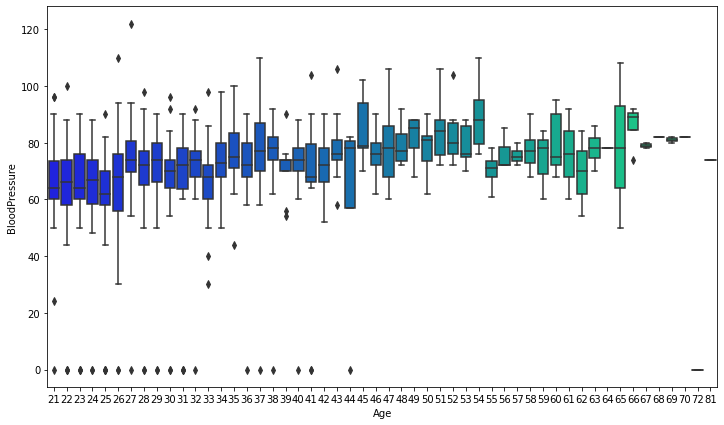

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age',y='BloodPressure',data=df,palette='winter')

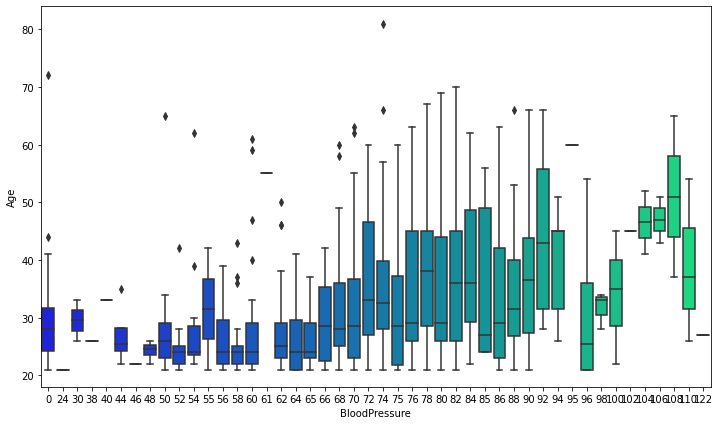

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='BloodPressure',y='Age',data=df,palette='winter')

As we can see the blood pressure 0 has ages around 21 to 27 years old, looking to the boxplot of Age against BloodPressure we see that people with 21 to 27 years old have a blood pressure around 66. So lets fix it.

In [17]:
def impute_bp(cols):
    Age = cols[0]
    bp = cols[1]
    
    if (bp == 0 & Age <27):
        bp = 66
        return bp
    else:
        return bp

In [18]:
df['BloodPressure'] = df[['Age','BloodPressure']].apply(impute_bp,axis=1)

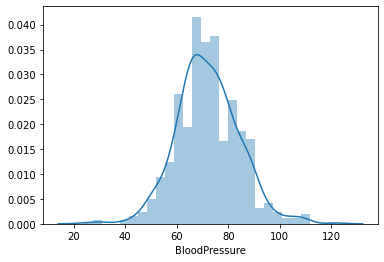

In [19]:
sns.distplot(df['BloodPressure'])

Now lets drop the data until the blood pressure of 40, since our dataset has less representation in that interval

In [20]:
df = df.sort_values('BloodPressure',ascending=True).iloc[10:]

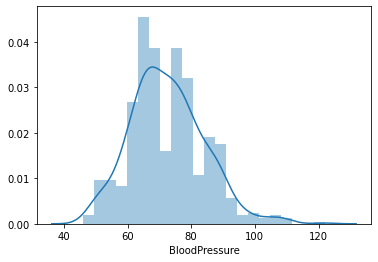

In [21]:
sns.distplot(df['BloodPressure'])

### 4) Skin Thickness

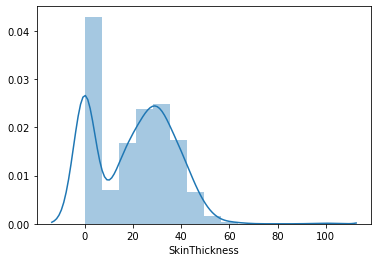

In [22]:
sns.distplot(df['SkinThickness'])

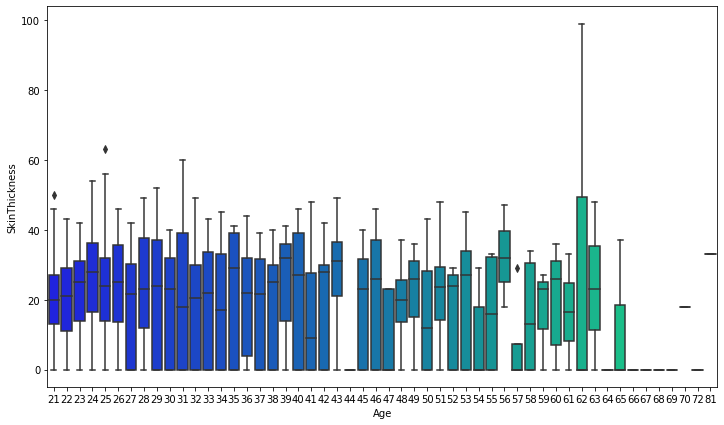

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age',y='SkinThickness',data=df,palette='winter')

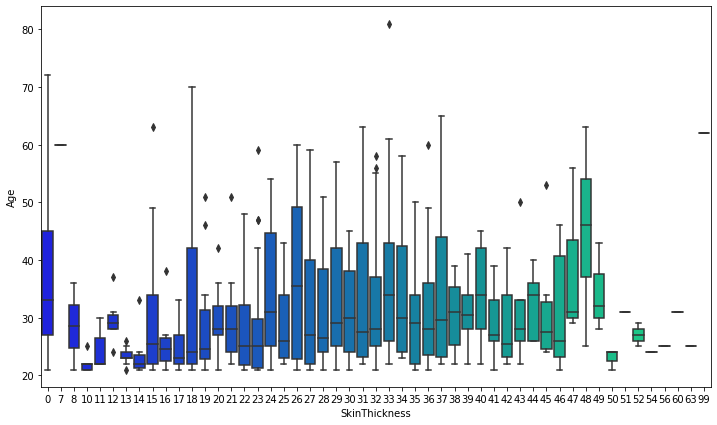

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SkinThickness',y='Age',data=df,palette='winter')

When the Skin Thickness is 0 we have people with an age around 25 to 45 so if we see the skin thickness of people with that age we conclude that it is around 25, so lets fix it.

In [25]:
def impute_st(cols):
    Age = cols[0]
    st = cols[1]
    
    if (st == 0 & Age <45):
        st = 25
        return st
    else:
        return st

In [26]:
df['SkinThickness'] = df[['Age','SkinThickness']].apply(impute_bp,axis=1)

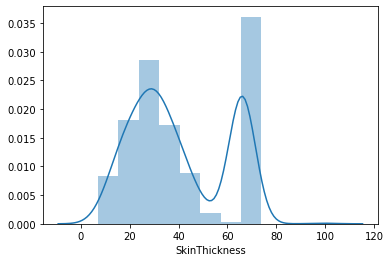

In [27]:
sns.distplot(df['SkinThickness'])

Now we can clean data until 10 and after 80.

In [28]:
df = df.sort_values('SkinThickness',ascending=True).iloc[90:]
df = df.sort_values('SkinThickness',ascending=False).iloc[10:]

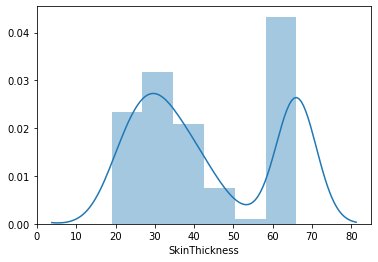

In [29]:
sns.distplot(df['SkinThickness'])

### 5) Insulin

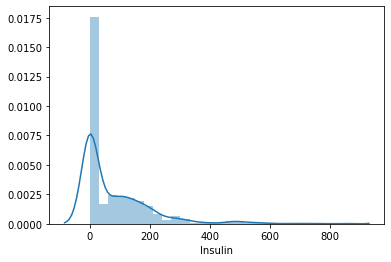

In [30]:
sns.distplot(df['Insulin'])

Lets do a little adjustment reducing the less expressed data

In [31]:
df = df.sort_values('Insulin',ascending=False).iloc[32:]

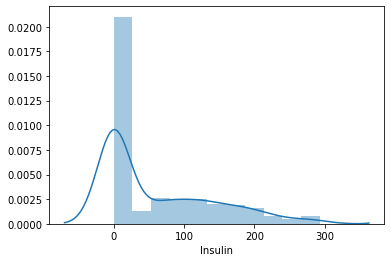

In [32]:
sns.distplot(df['Insulin'])

### 6) BMI

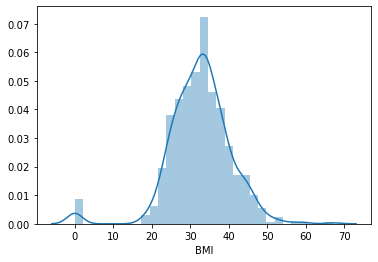

In [33]:
sns.distplot(df['BMI'])

People can not have 0 of BMi! So lets fix it!

In [34]:
df['BMI'].value_counts()

0.0     11
33.3    10
32.0    10
31.6    10
32.9     9
        ..
23.2     1
45.8     1
44.1     1
38.7     1
46.3     1
Name: BMI, Length: 228, dtype: int64

Since having BMI equals to 0 has less expression in the dataset we can remove all the lines with that BMI == 0

In [35]:
df = df.drop(df[df.BMI == 0].index)

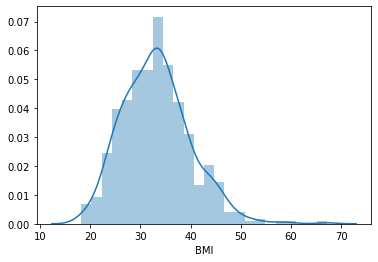

In [36]:
sns.distplot(df['BMI'])

Now lets remove the less expressive data.

In [37]:
df = df.sort_values('BMI',ascending=False).iloc[10:]

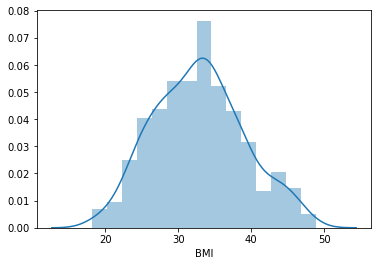

In [38]:
sns.distplot(df['BMI'])

### 7) Diabetes Pedigree Function

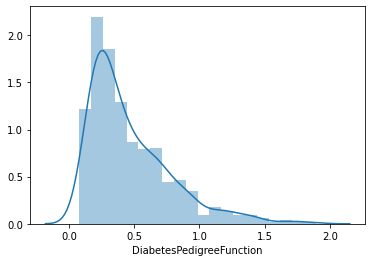

In [39]:
sns.distplot(df['DiabetesPedigreeFunction'])

We just need to reduce a little of the data that has less expression.

In [40]:
df = df.sort_values('DiabetesPedigreeFunction',ascending=False).iloc[4:]

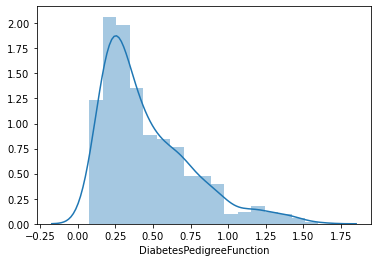

In [41]:
sns.distplot(df['DiabetesPedigreeFunction'])

### 8) Age

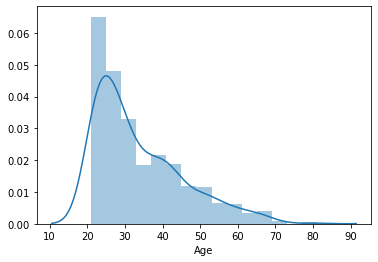

In [42]:
sns.distplot(df['Age'])

Lets clean data of age above 70 since it has little expression.

In [43]:
df = df.sort_values('Age',ascending=False).iloc[6:]

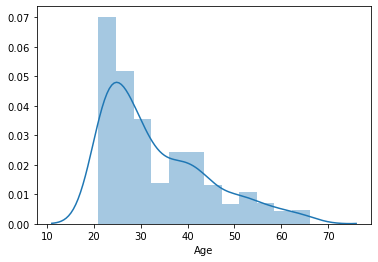

In [44]:
sns.distplot(df['Age'])

In [46]:
X = df.drop('Outcome', axis = 1).values
Y = df['Outcome'].values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 221 to 268
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               562 non-null    int64  
 1   Glucose                   562 non-null    int64  
 2   BloodPressure             562 non-null    int64  
 3   SkinThickness             562 non-null    int64  
 4   Insulin                   562 non-null    int64  
 5   BMI                       562 non-null    float64
 6   DiabetesPedigreeFunction  562 non-null    float64
 7   Age                       562 non-null    int64  
 8   Outcome                   562 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.9 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)